In [32]:
import numpy as np
import pandas as pd
import plots
plots.use_JHU_github_live_data()
%matplotlib inline

In [33]:
cases, deaths, recovered = plots.parse_country_data()
us_cases, us_deaths, us_testing = plots.parse_us_state_data()
wi_cases, wi_deaths, wi_testing = plots.parse_us_county_data("Wisconsin")
cda_cases, cda_deaths, cda_testing = plots.parse_province_data("Canada")

using live data
using live data
using live data
using live data


In [34]:
legend_fit_info = {'constant':2, 'length':8, 'type':'last'}
sightline_fit_info = [legend_fit_info, {'constant':2, 'length':8, 'type':'2weeksago'}, {'constant':2, 'length':8, 'type':'first'}]
per_capita_layout =  zip([cases,deaths],["cases","deaths"],[1,1])
raw_layout = zip([cases,deaths],["cases","deaths"],[100,5])

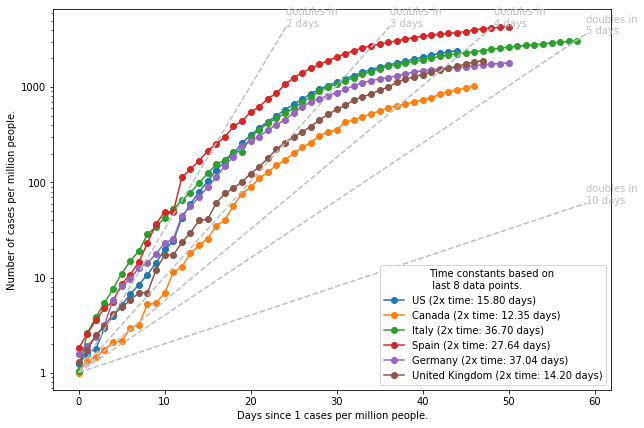

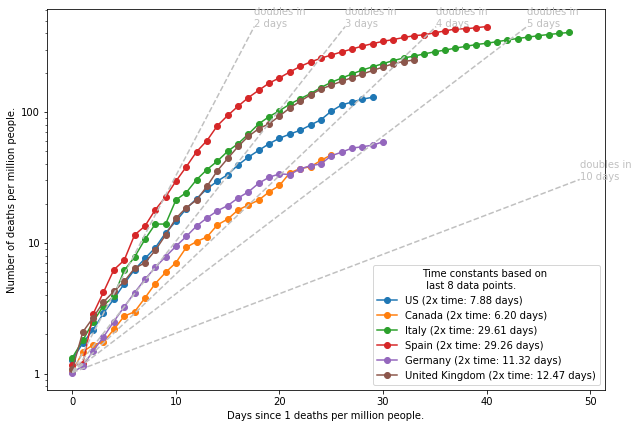

In [35]:
country_list = ["US","Canada","Italy","Spain","Germany","United Kingdom"]
country_sightline_list = []
for data_set, data_type, threshold in per_capita_layout:
    plots.semilog_per_capita_since(((data_set, country_list,plots.pop_data, country_sightline_list),), 
                                    data_type=data_type,
                                    threshold=threshold,
                                    legend_fit_info = legend_fit_info,
                                    sightline_fit_info = sightline_fit_info)

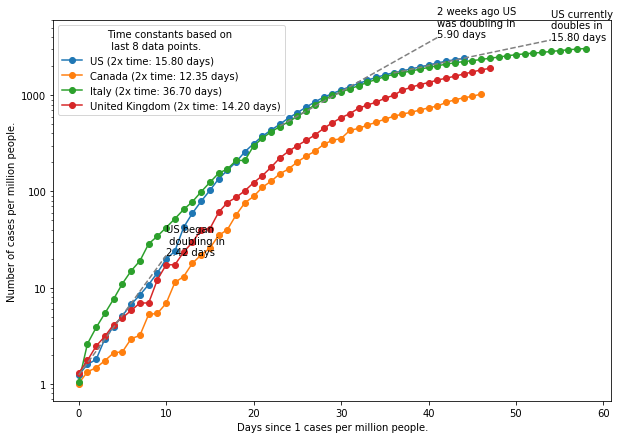

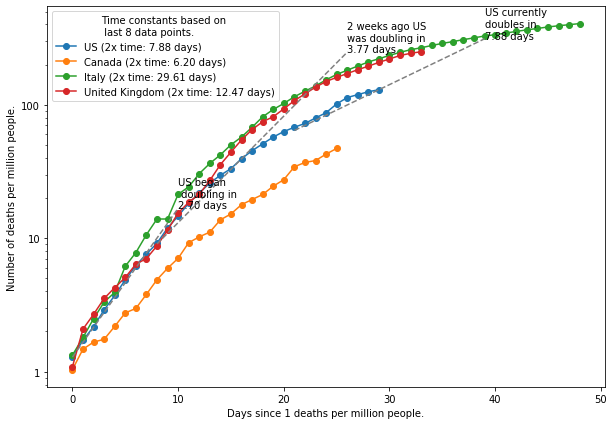

In [5]:
per_capita_layout =  zip([cases,deaths],["cases","deaths"],[1,1])
country_list = ["US","Canada","Italy","United Kingdom"]
country_sightline_list = ["US"]
for data_set, data_type, threshold in per_capita_layout:
    plots.semilog_per_capita_since(((data_set, country_list,plots.pop_data, country_sightline_list),), 
                                    data_type=data_type,
                                    threshold=threshold,
                                    legend_fit_info = legend_fit_info,
                                    sightline_fit_info = sightline_fit_info)

In [6]:
all_data_list = [(#(us_cases, ["Wisconsin","New York"], None, []),
                  (wi_cases,["Dane","Milwaukee","Waukesha"],None, []), 
                  #(cda_cases,["Alberta", "Ontario"], None, []),
                  ),
                 (#(us_deaths, ["Wisconsin","New York"], None, []),
                  (wi_deaths,["Milwaukee"],None, []),
                  #(cda_deaths,["Alberta", "Ontario"],None, []),
                 )]

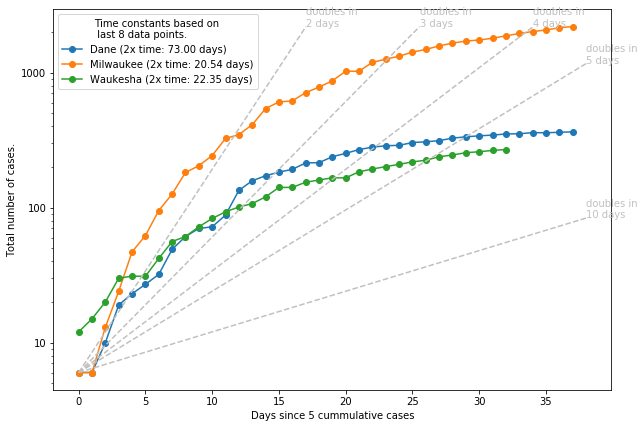

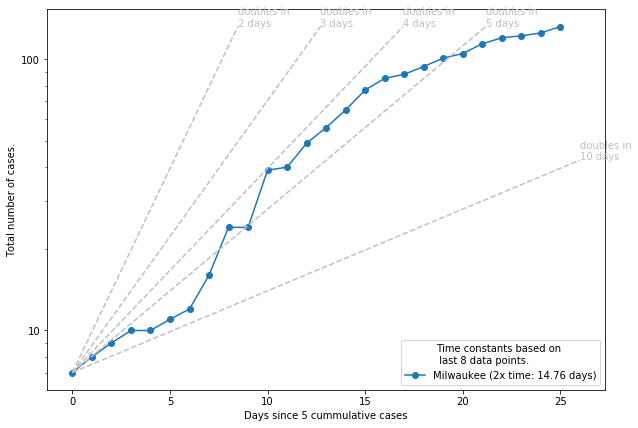

In [7]:
for data_list in all_data_list:
    plots.semilog_since(data_list,
                        data_type="cases",
                        threshold=5,
                        legend_fit_info = legend_fit_info)

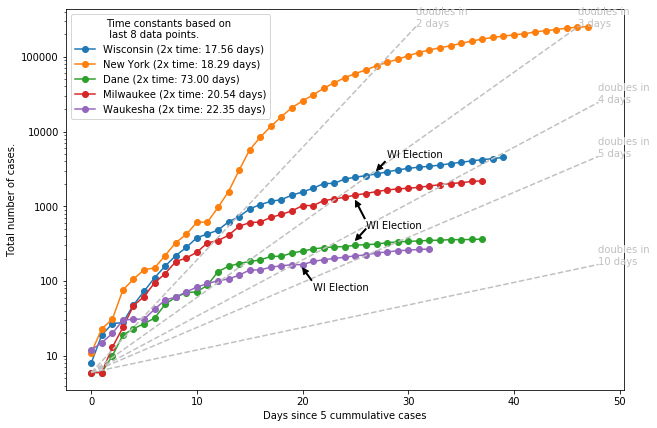

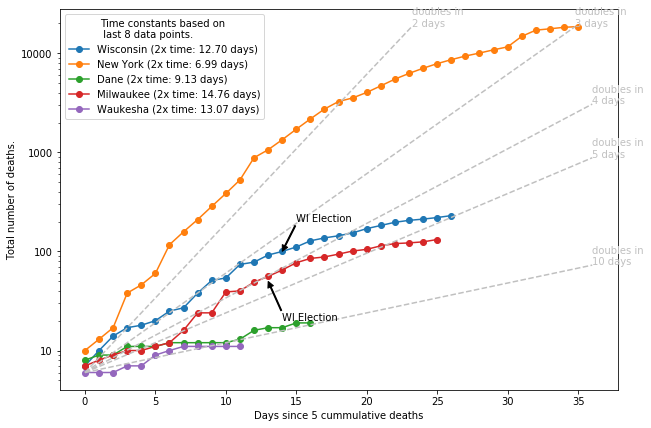

In [8]:
wi_election_cases_labels = ((27,3000,28,4500,"WI Election"), # State
                          (25,1200,26,500,"WI Election"), # MKE
                          (25,350,26,500,""), # Dane - reuse MKE label
                          (20,150,21,75,"WI Election")) # Waukesha
plots.semilog_since(((us_cases, ["Wisconsin","New York"], None, []),
                     (wi_cases,["Dane","Milwaukee","Waukesha"],None, [])),
                       data_type="cases", threshold=5, legend_fit_info=legend_fit_info,
                    labels=wi_election_cases_labels)
fig = plots.semilog_since(((us_deaths, ["Wisconsin","New York"], None, []),
                           (wi_deaths,["Dane","Milwaukee","Waukesha"],None, [])),
                           data_type="deaths", threshold=5, legend_fit_info=legend_fit_info,
                           labels=((14,100,15,200,"WI Election"),(13,50,14,20,"WI Election")))

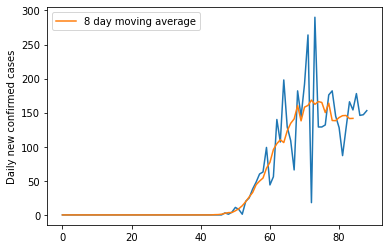

In [64]:
import matplotlib.pyplot as plt
wi_only_cases = np.array(us_cases[us_cases.index.isin(["Wisconsin"])].values.tolist())[0]
wi_per_day = wi_only_cases[1:]-wi_only_cases[:-1]
window = 4
wi_per_day_avg = np.zeros(wi_per_day.size-window)
for day in range(window,wi_per_day.size-window):
    #print(wi_per_day[day-window:day+window])
    wi_per_day_avg[day] = np.sum(wi_per_day[day-window:day+window])/(2*window)
plt.plot(range(wi_per_day.size),wi_per_day)
plt.plot(range(wi_per_day_avg.size),wi_per_day_avg,
         label='{} day moving average'.format(2*window))
plt.ylabel('Daily new confirmed cases')

plt.legend()

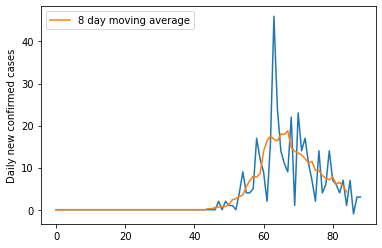

In [70]:
mke_only_cases = np.array(wi_cases[wi_cases.index.isin(["Dane"])].values.tolist())[0]
mke_per_day = mke_only_cases[1:]-mke_only_cases[:-1]
window = 4
mke_per_day_avg = np.zeros(mke_per_day.size-window)
for day in range(window,mke_per_day.size-window):
    #print(mke_per_day[day-window:day+window])
    mke_per_day_avg[day] = np.sum(mke_per_day[day-window:day+window])/(2*window)
plt.plot(range(mke_per_day.size),mke_per_day)
plt.plot(range(mke_per_day_avg.size),mke_per_day_avg,
         label='{} day moving average'.format(2*window))
plt.ylabel('Daily new confirmed cases')
plt.legend()

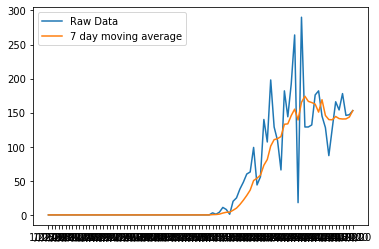

In [63]:
window=5
state = "Wisconsin"
county = "Milwaukee"
plt.plot(us_cases[us_cases.index.isin([state])].T.diff().T.replace(np.nan,0).T,label="Raw Data")
for window in [7]:
    plt.plot(us_cases[us_cases.index.isin([state])].T.diff().rolling(window=window).mean().T.replace(np.nan,0).T,label="{} day moving average".format(window))
plt.legend()

In [11]:

print(range(1,3))

range(1, 3)


In [12]:
for data_set, data_type, threshold in raw_layout:
    plots.semilog_since(((data_set, country_list, None),),
                                   data_type=data_type,
                                   threshold=threshold,
                                   fit_info = fit_info)

NameError: name 'fit_info' is not defined

In [ ]:
plots.generate_all_plots(country_list)

In [ ]:
plots.semilog_cases_since(country_list)

In [ ]:
yscale = 1e6
fit_info = {'type':'last', 'length':8, 'constant':2}
axis = {'xmin':0, 'xmax':50, 'ymin':1/yscale, 'ymax':3000/yscale}
tmp_data = plots.select_region_data(cases, "US", plots.pop_data["US"], 5/yscale)
time_constant = plots.fit_region_data(tmp_data,fit_info)
guide_x,guide_y = plots.calculate_sightline(tmp_data,axis,time_constant,fit_info)
print(guide_x,guide_y)